<a href="https://colab.research.google.com/github/PabloAndree/Python_PA/blob/main/%5BStudentView%5D_Lab3_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3: Data Cleaning**

El objetivo de este laboratorio es presentar las técnica de data wrangling de limpieza de datos.

In [1]:
#Carguemos librerías
import pandas as pd
import matplotlib.pyplot as plt

### **Contexto:**

Imagine que una campaña electoral de EEUU lo ha contratado para utilizar el poder de los datos ***con el objetivo de ayudar a mover la aguja***. Con tal fin, la tarea es analizar los discursos que ha pronunciado el 45º presidente de los Estados Unidos, Donald Trump. La recopilación de datos se encuentra en una carpeta que contiene archivos de texto (.txt) para cada uno de los discursos de Donald Trump pronunciados en 2019 y 2020.

Link de la carpeta: https://drive.google.com/drive/folders/1J4tL7eXUqdtvRWdHRlleUAcgg2Yayw0G?usp=sharing


## **Paso 1:** Adquisición de los datos

Adquirimos los datos a partir del Google Drive Folder

In [2]:
#Librerias para acceder a Google Drive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
#Autenticación
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#Get Lista de Documentos
fileList = drive.ListFile({'q': "'1J4tL7eXUqdtvRWdHRlleUAcgg2Yayw0G' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))

Title: BattleCreekDec19_2019.txt, ID: 1X7PTzhPmRxjUfNiXpwFQ9MU44D4BjBq0
Title: TexasSep23_2019.txt, ID: 1jcx7wVcp3sfJ3tf_-z-Oj-ztwcN1Teny
Title: MinneapolisOct10_2019.txt, ID: 186_gu73HDjZQcdF0rUdEJ5CQrjrfcQ67
Title: MindenSep12_2020.txt, ID: 19kg3OdgPtio4tW_Nv8Co7cjFAjDm6AAT
Title: NewHampshireFeb10_2020.txt, ID: 1K-E5l56AGsOElecY9xxm6Pg6p-47gCLu
Title: OhioSep21_2020.txt, ID: 1yKd-P9cu75qmli-KlmC3FE3sVwJS918f
Title: DesMoinesJan30_2020.txt, ID: 1AIXZr2r7N2g-m7jRXNNQXXSV2PudBEAo
Title: MosineeSep17_2020.txt, ID: 1PRCtS74vcGu3hMx58JMEAIqC199Z-m0j
Title: HersheyDec10_2019.txt, ID: 1TXgBi5q8VbSbUNzH4I1YMp8d3R92WWcb
Title: FayettevilleSep19_2020.txt, ID: 1PvChCQPty649rTbdGkchrrNu5cwoWRCB
Title: NewMexicoSep16_2019.txt, ID: 1hSgYGpFqS_g-50LssGMoai7V-BjaH2WO
Title: GreenvilleJul17_2019.txt, ID: 1NXIzuw-8tPFClg53AIovMp3Bu_ZjKzPM
Title: ToledoJan9_2020.txt, ID: 1ZQJlkHxkdU0jEfZavWKG1XiMo_RMGa8E
Title: ColoradorSpringsFeb20_2020.txt, ID: 1qedWvhITAMwZFrSLywPGX3C5mlB05g0l
Title: MilwaukeeJan14_

In [5]:
type(fileList)

list

## **Paso 2:** Data Cleaning


### **Nivel I: Limpieza General**
Tiene las siguientes características:
*   Está en una estructura de datos estándar.
*   Tiene nombres de columna codificables e intuitivos.
*   Cada fila tiene un identificador único.

In [6]:
listDic = []

for file in fileList:
  dic={}
  dic["FileName"] = file['title']
  dic["Contenido"] = drive.CreateFile({'id': file.get('id')}).GetContentString()
  listDic.append(dic)

df = pd.DataFrame(listDic)
df

,FileName,Contenido
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in..."
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi..."
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star..."
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ..."
5,OhioSep21_2020.txt,"Wow, that's a big crowd. This is a big crowd. ..."
6,DesMoinesJan30_2020.txt,I worked so hard for this state. I worked so h...
7,MosineeSep17_2020.txt,"Thank you, thank you very much. Thank you very..."
8,HersheyDec10_2019.txt,"Well, thank you to Vice President Pence. Than..."
9,FayettevilleSep19_2020.txt,"What a crowd, what a crowd. Get those people o..."


In [7]:
#TO DO: Realizar Nivel I de Limpieza de Datos
listDic = []
for file in fileList:
  dic = {}
  dic['FileName'] = file['title']
  dic['Contenido'] = drive.CreateFile({'id': file.get('id')}).GetContentString()
  listDic.append(dic)

df = pd.DataFrame(listDic)
df.head()

,FileName,Contenido
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in..."
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi..."
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star..."
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ..."


### **Nivel II: En base a herramientas análiticas**

Recordemos que el objetivo es analizar los discursos los discursos de Donald Trump. **¿Cómo hacemos el análisis?**

#### **Paso 1:** Limpiamos en base al título

Extraemos la Ciudad

In [8]:
Meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [9]:
def SepararCiudad(row):
  for mes in Meses:
    if mes in row:
      return row[0:row.find(mes)]


In [10]:
df['Ciudad'] = df.FileName.apply(lambda row : SepararCiudad(row))

In [ ]:
df.head()

,FileName,Contenido,Ciudad
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in...",Texas
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi...",Minneapolis
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star...",Minden
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ...",NewHampshire


Extraemos la fecha

In [11]:
def SepararFecha(row):

  return row.FileName[len(row.Ciudad):row.FileName.find(".")]


In [12]:
df['Fecha'] = df.apply(lambda row : SepararFecha(row), axis=1)
df.head()

,FileName,Contenido,Ciudad,Fecha
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,Dec19_2019
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in...",Texas,Sep23_2019
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi...",Minneapolis,Oct10_2019
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star...",Minden,Sep12_2020
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ...",NewHampshire,Feb10_2020


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   35 non-null     object
 1   Contenido  35 non-null     object
 2   Ciudad     35 non-null     object
 3   Fecha      35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [14]:
df.Fecha = pd.to_datetime(df.Fecha, format='%b%d_%Y')
df.head()

,FileName,Contenido,Ciudad,Fecha
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in...",Texas,2019-09-23
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi...",Minneapolis,2019-10-10
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star...",Minden,2020-09-12
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ...",NewHampshire,2020-02-10


Separamos la fecha en 3 columnas: Day, Month y Year

In [15]:
def extraeerDMY(row):

  row["Dia"] = row.Fecha.day
  row["Mes"] = row.Fecha.month
  row["Año"] = row.Fecha.year

  return row

In [16]:
df = df.apply(extraeerDMY,axis=1)
df.head()

,FileName,Contenido,Ciudad,Fecha,Dia,Mes,Año
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in...",Texas,2019-09-23,23,9,2019
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi...",Minneapolis,2019-10-10,10,10,2019
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star...",Minden,2020-09-12,12,9,2020
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ...",NewHampshire,2020-02-10,10,2,2020


#### **Paso 2:** Limpiamos el contenido

In [17]:
words = ['vote', 'tax', 'campaing', 'economy']

#### **Paso 3:** Reformulamos una nueva tabla para visualización

In [24]:
def contar_palabras_en_parrafo(parrafo, lista_palabras):
    # Convertir el párrafo a minúsculas y dividirlo en palabras
    palabras_parrafo = parrafo.lower().split()

    # Crear un diccionario para contar las ocurrencias
    contador = {palabra: 0 for palabra in lista_palabras}

    for palabra in palabras_parrafo:
        if palabra in contador:
            contador[palabra] += 1

    return contador

# Lista de palabras
words = ['vote', 'tax', 'campaing', 'economy']

# Ejemplo de párrafo
parrafo = "The economy is important. We need to vote on the tax campaign to improve the economy."

# Contar palabras en el párrafo
resultado = contar_palabras_en_parrafo('Contenido', words)
print(resultado)

{'vote': 0, 'tax': 0, 'campaing': 0, 'economy': 0}


In [40]:
def FindWordRatio(row):

    total = len(row.Contenido.split(' '))
    for w in words:
       row['r_{}'.format(w)] = row.Contenido.count(w)/total
    return row

df = df.apply(FindWordRatio,axis=1)
df.head()

,FileName,Contenido,Ciudad,Fecha,Dia,Mes,Año,r_vote,r_tax,r_campaing,r_economy
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.0,0.000617
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in...",Texas,2019-09-23,23,9,2019,0.000804,0.002413,0.0,0.000804
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi...",Minneapolis,2019-10-10,10,10,2019,0.000343,0.000172,0.0,0.000515
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star...",Minden,2020-09-12,12,9,2020,0.001137,0.001137,0.0,0.000284
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ...",NewHampshire,2020-02-10,10,2,2020,0.001975,0.000304,0.0,0.000456


In [47]:
Meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

lambda_func = lambda r: '{}_{}'.format(r.Año,Meses[r.Mes-1])

df['Y_M'] = df.apply(lambda_func,axis=1)
df

,FileName,Contenido,Ciudad,Fecha,Dia,Mes,Año,r_vote,r_tax,r_campaing,r_economy,Y_M
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.0,0.000617,2019_Dec
1,TexasSep23_2019.txt,"Hello, Houston. I am so thrilled to be here in...",Texas,2019-09-23,23,9,2019,0.000804,0.002413,0.0,0.000804,2019_Sep
2,MinneapolisOct10_2019.txt,"Thank you very much. Thank you, Minnesota. Thi...",Minneapolis,2019-10-10,10,10,2019,0.000343,0.000172,0.0,0.000515,2019_Oct
3,MindenSep12_2020.txt,"Well, I thank you very much. So I want to star...",Minden,2020-09-12,12,9,2020,0.001137,0.001137,0.0,0.000284,2020_Sep
4,NewHampshireFeb10_2020.txt,"Hello, Manchester, and I am thrilled to be in ...",NewHampshire,2020-02-10,10,2,2020,0.001975,0.000304,0.0,0.000456,2020_Feb
5,OhioSep21_2020.txt,"Wow, that's a big crowd. This is a big crowd. ...",Ohio,2020-09-21,21,9,2020,0.000926,0.000463,0.0,0.000278,2020_Sep
6,DesMoinesJan30_2020.txt,I worked so hard for this state. I worked so h...,DesMoines,2020-01-30,30,1,2020,0.001111,0.000940,0.0,0.000171,2020_Jan
7,MosineeSep17_2020.txt,"Thank you, thank you very much. Thank you very...",Mosinee,2020-09-17,17,9,2020,0.001306,0.000825,0.0,0.000275,2020_Sep
8,HersheyDec10_2019.txt,"Well, thank you to Vice President Pence. Than...",Hershey,2019-12-10,10,12,2019,0.000916,0.000611,0.0,0.000713,2019_Dec
9,FayettevilleSep19_2020.txt,"What a crowd, what a crowd. Get those people o...",Fayetteville,2020-09-19,19,9,2020,0.001297,0.000185,0.0,0.000185,2020_Sep


In [48]:
import numpy as np


In [49]:
vis_df = df.pivot_table(
               index= ['Y_M'],
               values= ['r_{}'.format(w) for w in words],
               aggfunc= np.mean)

vis_df

<ipython-input-49-11386d903a1b>:1: FutureWarning: The provided callable <function mean at 0x7be0f5465000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  vis_df = df.pivot_table(


,r_campaing,r_economy,r_tax,r_vote
Y_M,,,,
2019_Aug,0.0,0.000270,0.000872,0.001596
2019_Dec,0.0,0.000665,0.000558,0.000739
2019_Jul,0.0,0.000660,0.000660,0.001603
2019_Nov,0.0,0.000333,0.000385,0.002048
2019_Oct,0.0,0.000448,0.000419,0.000409
2019_Sep,0.0,0.000572,0.001340,0.001398
2020_Aug,0.0,0.000222,0.001189,0.001577
2020_Feb,0.0,0.000224,0.000625,0.001206
2020_Jan,0.0,0.000240,0.001331,0.001215


In [ ]:
#Empleando Groupy
vis_df = pd.DataFrame({
  'r_vote': df.groupby('Y_M').r_vote.mean(),
  'r_tax': df.groupby('Y_M').r_tax.mean(),
  'r_campaign': df.groupby('Y_M').r_campaign.mean(),
  'r_economy': df.groupby('Y_M').r_economy.mean()
})

vis_df

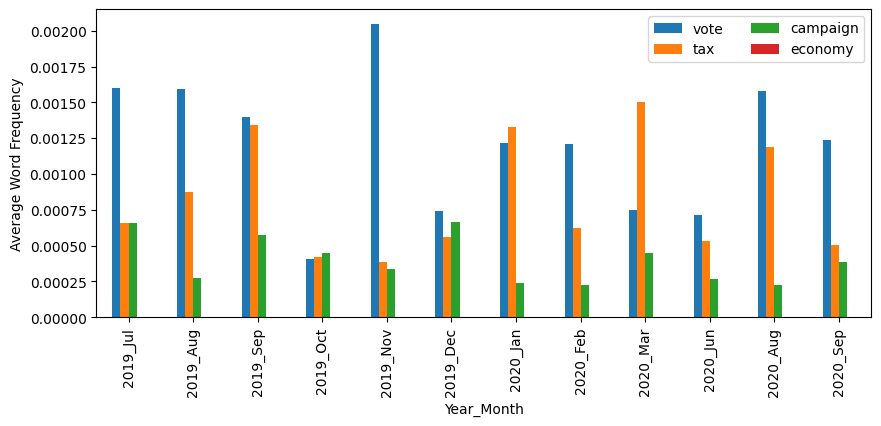

In [50]:
column_order = vis_df.sum().sort_values(ascending=False).index

row_order = df.sort_values('Fecha').Y_M.unique()

vis_df[column_order].loc[row_order].plot.bar(figsize=(10,4))
plt.legend(['vote','tax','campaign','economy'],ncol=2)
plt.xlabel('Year_Month')
plt.ylabel('Average Word Frequency')

plt.show()